# Grupo 7

### Ejercicio 3 

#### Andrés Felipe Botero, Diego Alejandro Díaz, Juliana López Botero, Carolina Niño Gutiérrez

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

### 03.1 - Plot and analyze the ACF and PACF of the 4 time series in data_arma.csv:
#### What do these plots suggest about the data being an AR or MA process?

In [10]:
# Cargamos el Data Set
df = pd.read_csv('/Users/carolinaninogutierrez/Desktop/MODELOS_AVANZADOS/ENTREGA1/E3/data_arma.txt')
# Quitamos la columna unnamed 
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


<AxesSubplot:>

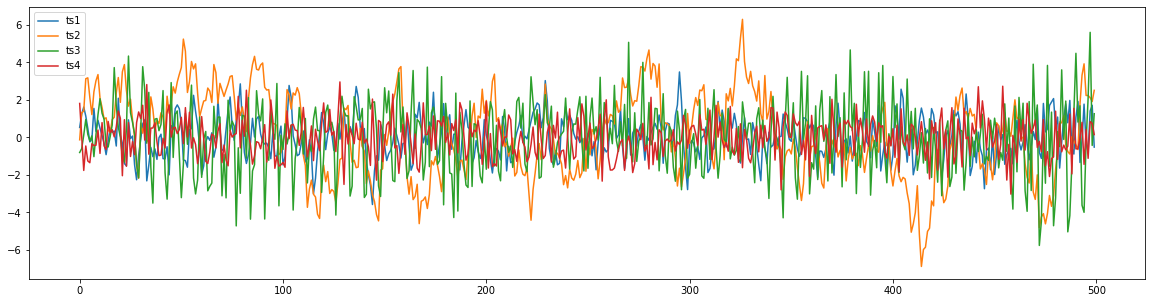

In [17]:
df.plot(figsize=(20,5), linewidth=1.5, fontsize=10)


# Serie #1

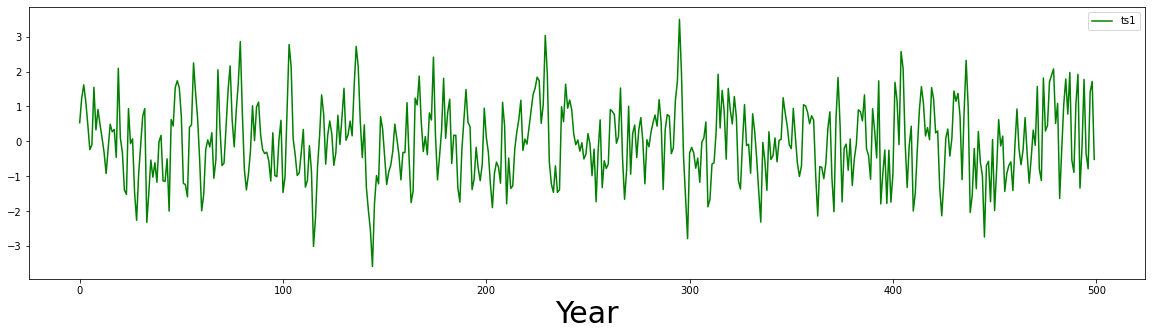

In [24]:
df[['ts1']].plot(figsize=(20,5), linewidth=1.5, fontsize=10, color= "green")
plt.xlabel('Year', fontsize=30);

In [28]:
result = adfuller(df['ts1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.634560
p-value: 0.000000
Valores Críticos:
	1%: -3.444
	5%: -2.867
	10%: -2.570


### Evidenciamos con un alpha < 0.05 que se rechaza la hipótesis nula en la prueba de Dickey & Fuller y la serie es estacionaria, esto tambien lo podemos evidenciar en la gráfica anterior


# ACF y PACF

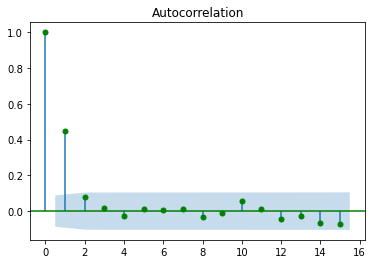

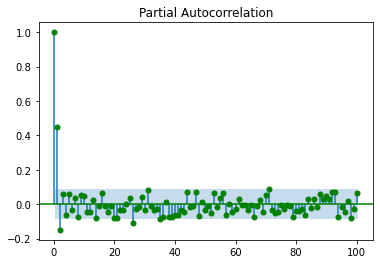

In [44]:
plot_acf(df['ts1'], lags=15, color = "green");plot_pacf(df['ts1'], lags=100, color = "green");

### La tendencia del ACF es decreciente y se mantiene dentro del rango, por otra parte, en el gráfico de PACF evidenciamos que es sugerido un ARMA(1,1) para la serie temporal dado que su corte se da luego de un retardo

# Serie #2

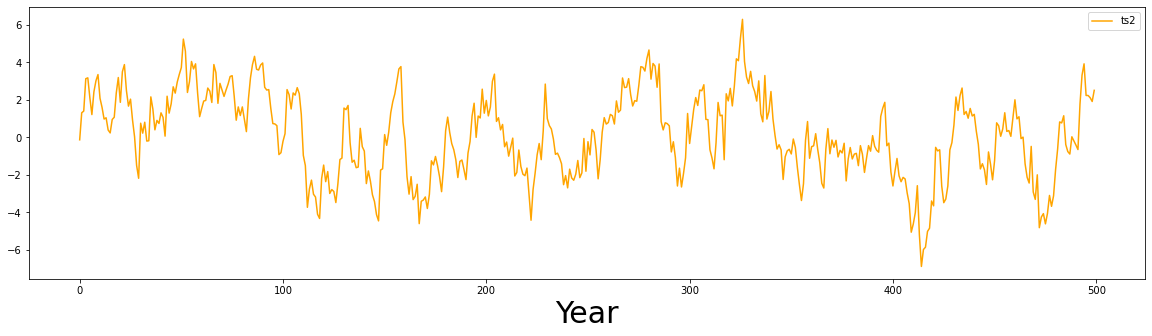

In [39]:
df[['ts2']].plot(figsize=(20,5), linewidth=1.5, fontsize=10, color= "orange")
plt.xlabel('Year', fontsize=30);

In [40]:
result = adfuller(df['ts2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.345985
p-value: 0.000004
Valores Críticos:
	1%: -3.444
	5%: -2.867
	10%: -2.570


### Así como en la Serie #1, evidenciamos con un alpha < 0.05 que se rechaza la hipótesis nula en la prueba de Dickey & Fuller y la serie es estacionaria, esto tambien lo podemos evidenciar en la gráfica anterior

# ACF y PACF

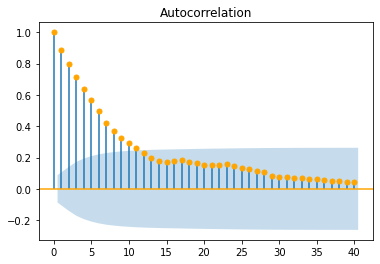

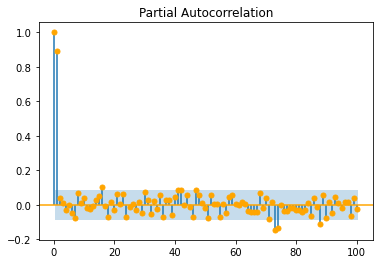

In [49]:
plot_acf(df['ts2'], lags=40, color = "Orange");plot_pacf(df['ts2'], lags=100, color = "orange");

### La tendencia del ACF es decreciente y se mantiene dentro del rango, por otra parte, en el gráfico de PACF evidenciamos que es sugerido un AR(1) para la serie temporal dado que su corte se da luego de un retardo

# Serie #3

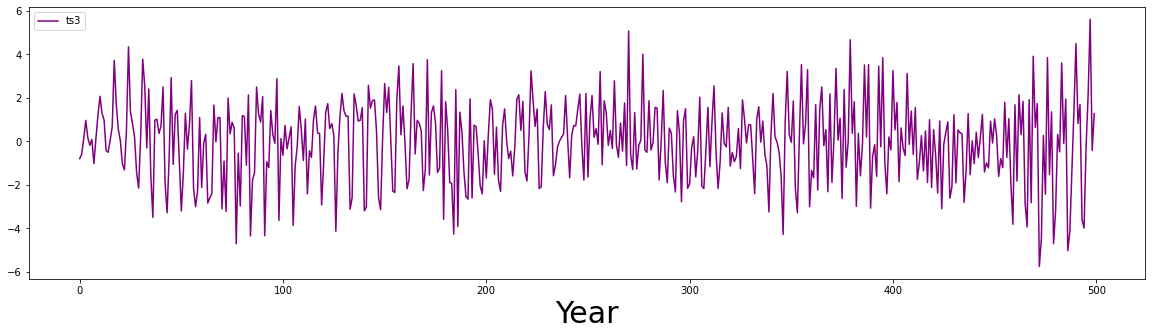

In [50]:
df[['ts3']].plot(figsize=(20,5), linewidth=1.5, fontsize=10, color= "purple")
plt.xlabel('Year', fontsize=30);

In [51]:
result = adfuller(df['ts3'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.708845
p-value: 0.003990
Valores Críticos:
	1%: -3.444
	5%: -2.867
	10%: -2.570


### Así como en las Serie #1 y #2, evidenciamos con un alpha < 0.05 que se rechaza la hipótesis nula en la prueba de Dickey & Fuller y la serie es estacionaria, esto tambien lo podemos evidenciar en la gráfica anterior

# ACF y PACF

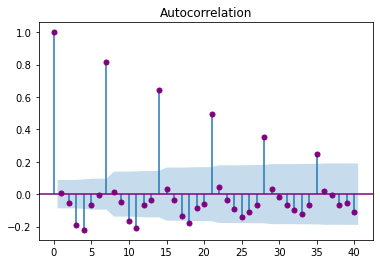

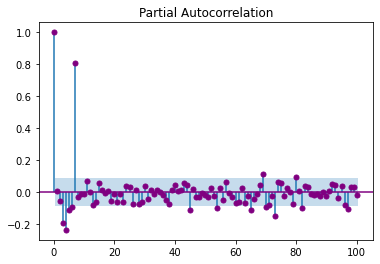

In [53]:
plot_acf(df['ts3'], lags=40, color = "purple");plot_pacf(df['ts3'], lags=100, color = "purple");

### La tendencia del ACF evidenciamos que es sugerido un MA(q) para la serie temporal dado que su corte se da luego de un retardo

# Serie #4 

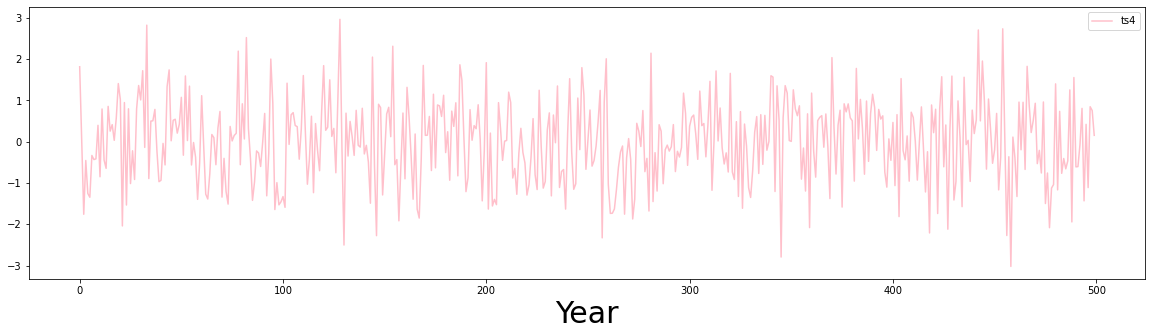

In [54]:
df[['ts4']].plot(figsize=(20,5), linewidth=1.5, fontsize=10, color= "pink")
plt.xlabel('Year', fontsize=30);

In [55]:
result = adfuller(df['ts4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.943060
p-value: 0.000000
Valores Críticos:
	1%: -3.444
	5%: -2.867
	10%: -2.570


### Así como en las Serie #1, #2 y #3, evidenciamos con un alpha < 0.05 que se rechaza la hipótesis nula en la prueba de Dickey & Fuller y la serie es estacionaria, esto tambien lo podemos evidenciar en la gráfica anterior

# ACF Y PACF

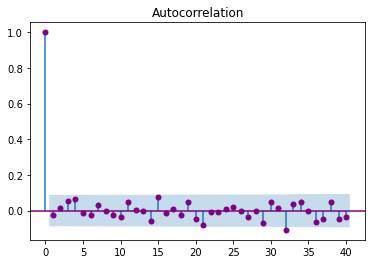

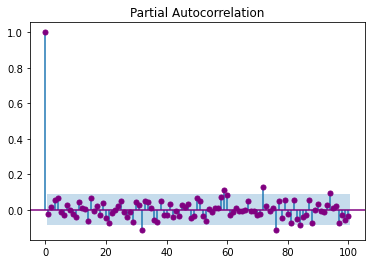

In [56]:
plot_acf(df['ts4'], lags=40, color = "purple");plot_pacf(df['ts4'], lags=100, color = "purple");

## 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimize the mean squared error (MSE) of the rolling forecast

In [60]:
series = pd.read_csv('/Users/carolinaninogutierrez/Desktop/MODELOS_AVANZADOS/ENTREGA1/E3/shampoo.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

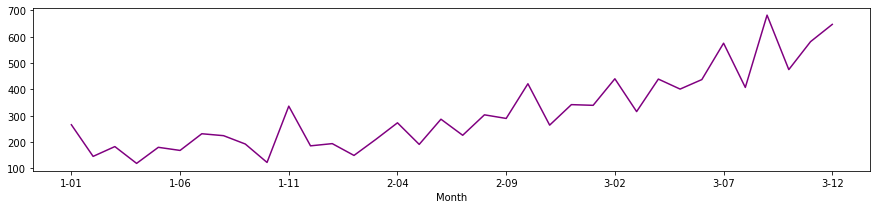

In [68]:
series.plot(figsize=(15, 3), color= "purple");

#### Se realiza la prueba de D&F dado que la serie presenta tendencia creciente 

In [72]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Valores críticos:
	1%: -3.724
	5%: -2.986
	10%: -2.633


#### Evidenciamos con un alpha > 0.05 que no se rechaza la hipótesis nula en la prueba de Dickey & Fuller y la serie no es estacionaria por lo tanto debemos diferenciar

<AxesSubplot:xlabel='Month'>

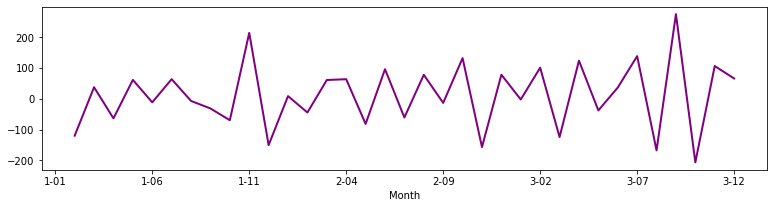

In [70]:
series.diff().plot(figsize=(13,3), linewidth=2, fontsize=10, color= "purple")


#### Volvemos a realizar la prueba de D&F

In [71]:
result = adfuller(series.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.249074
p-value: 0.000000
Valores críticos:
	1%: -3.646
	5%: -2.954
	10%: -2.616


### Evidenciamos con un alpha < 0.05 que se rechaza la hipótesis nula en la prueba de Dickey & Fuller y la serie es estacionaria

# ACF y PACF

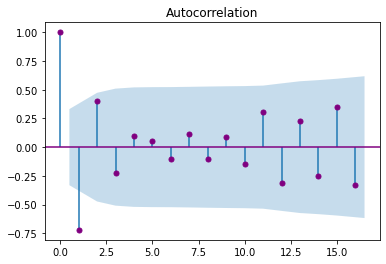

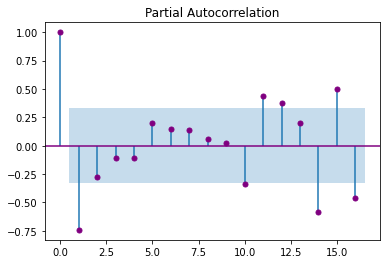

In [74]:
plot_acf(series.diff().iloc[1:], color= "purple");plot_pacf(series.diff().iloc[1:], color= "purple");



## MODELO #1 ARIMA(P=1,D=1,Q=0) 


In [86]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 19188.930


## MODELO #2 ARIMA(P=1,D=1,Q=1)

In [80]:
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Sun, 11 Jul 2021   AIC                            402.467
Time:                        22:03:54   BIC                            408.688
Sample:                             1   HQIC                           404.614
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     

/Users/carolinaninogutierrez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/carolinaninogutierrez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/carolinaninogutierrez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested 

In [87]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(1,1,1))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

Error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % Error)

Test MSE: 25780.675


/Users/carolinaninogutierrez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/carolinaninogutierrez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels

## Luego de hacer algunas pruebas, el modelo con menor MSE es el siguiente

## ARIMA(P=3,D=2,Q=0)

In [103]:
##for i in range(10):
model = ARIMA(history, order=(3,2,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future
error = mean_squared_error(test, predictions)
error

/Users/carolinaninogutierrez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


8144.232685574216

### Gráfico de errores residuales

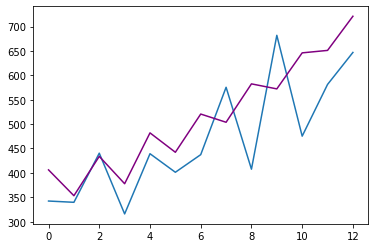

In [108]:

plt.plot(test)
plt.plot(predictions, color='purple')
plt.show()

### Como podemos observar en la gráfica, nuestro modelo P=3, D=2, Q=0 estima de forma cercana la tendencia de la serie real y fue el que tuvo menor MSE con un valor de 8.144